In [1]:
import numpy as np

In [2]:
import torch

In [3]:
from __future__ import print_function
import argparse
import numpy  as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms

In [4]:
import data_loaders

In [5]:
from data_loaders import Plain_Dataset, eval_data_dataloader

In [6]:
from deep_emotion import Deep_Emotion

In [7]:
from generate_data import Generate_data

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [9]:
def Train(epochs,train_loader,val_loader,criterion,optmizer,device):
    '''
    Training Loop
    '''
    print("===================================Start Training===================================")
    for e in range(epochs):
        train_loss = 0
        validation_loss = 0
        train_correct = 0
        val_correct = 0
        # Train the model  #
        net.train()
        for data, labels in train_loader:
            data, labels = data.to(device), labels.to(device)
            optmizer.zero_grad()
            outputs = net(data)
            #print(outputs[0])
            #print(outputs[0])

            loss = criterion(outputs,labels)
            #print(labels[0])
             
            loss.backward()
            optmizer.step()
            train_loss += loss.item()
            _, preds = torch.max(outputs,1)
            train_correct += torch.sum(preds == labels.data)

        #validate the model#
        net.eval()
        for data,labels in val_loader:
            data, labels = data.to(device), labels.to(device)
            val_outputs = net(data)
            #print(val_outputs[0][3])
            #print(labels[0])
            val_loss = criterion(val_outputs, labels)
            validation_loss += val_loss.item()
            _, val_preds = torch.max(val_outputs,1)
            val_correct += torch.sum(val_preds == labels.data)

        train_loss = train_loss/len(train_dataset)
        train_acc = train_correct.double() / len(train_dataset)
        validation_loss =  validation_loss / len(validation_dataset)
        val_acc = val_correct.double() / len(validation_dataset)
        print('Epoch: {} \tTraining Loss: {:.8f} \tValidation Loss {:.8f} \tTraining Acuuarcy {:.3f}% \tValidation Acuuarcy {:.3f}%'
                                                           .format(e+1, train_loss,validation_loss,train_acc * 100, val_acc*100))

    torch.save(net.state_dict(),'deep_emotion-{}-{}-{}.pt'.format(epochs,batchsize,lr))
    print("===================================Training Finished===================================")



In [10]:
parser = argparse.ArgumentParser(description="Configuration of setup and training process")
parser.add_argument('-s', '--setup', type=bool, help='setup the dataset for the first time')
  

_StoreAction(option_strings=['-s', '--setup'], dest='setup', nargs=None, const=None, default=None, type=<class 'bool'>, choices=None, help='setup the dataset for the first time', metavar=None)

In [11]:
epochs = 1500
lr = 0.001
batchsize = 128

In [12]:
net = Deep_Emotion()

In [13]:
net.to(device)

Deep_Emotion(
  (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (conv2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (dropout2): Dropout(p=0.25, inplace=False)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (dropout3): Dropout(p=0.25, inplace=False)
  (conv4): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (dropout4): Dropout(p=0.25, inplace=False)
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(50, 50, kernel_size=(2, 2), stride=(1, 1))
  (conv6): Conv2d(50, 10, kernel_size=(2, 2), stride=(1, 1))
  (pool6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (norm): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=810, out_features=100, bias=True)
  (fc2): Linear(in_features=100

In [14]:
print("Model archticture: ", net)

Model archticture:  Deep_Emotion(
  (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (conv2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (dropout2): Dropout(p=0.25, inplace=False)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (dropout3): Dropout(p=0.25, inplace=False)
  (conv4): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (dropout4): Dropout(p=0.25, inplace=False)
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(50, 50, kernel_size=(2, 2), stride=(1, 1))
  (conv6): Conv2d(50, 10, kernel_size=(2, 2), stride=(1, 1))
  (pool6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (norm): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=810, out_features=100, bias=True)
  (fc2): Li

In [15]:
transformation= transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

In [16]:
traincsv_file = "data2" + "/"+"train.csv"
validationcsv_file = "data2" + "/"+"val.csv"

In [17]:
train_img_dir = "data2"+"/"+"train/"

In [18]:
validation_img_dir = "data2"+"/"+"val/"

In [19]:
train_dataset= Plain_Dataset(csv_file=traincsv_file, img_dir = train_img_dir, datatype = 'train', transform = transformation)


In [20]:
validation_dataset= Plain_Dataset(csv_file=validationcsv_file, img_dir = validation_img_dir, datatype = 'val', transform = transformation)


In [21]:
train_loader= DataLoader(train_dataset,batch_size=batchsize,shuffle = True,num_workers=0)
val_loader=   DataLoader(validation_dataset,batch_size=batchsize,shuffle = True,num_workers=0)

In [48]:
criterion= nn.CrossEntropyLoss()
optmizer= optim.Adam(net.parameters(),lr= 0.0001, weight_decay = 0.000005)


In [49]:
Train(500, train_loader, val_loader, criterion, optmizer, device)

===================================Start Training===================================


/home/youssef/home/youssef/Desktop/anaconda/lib/python3.9/site-packages/torch/nn/functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/home/youssef/home/youssef/Desktop/anaconda/lib/python3.9/site-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


Epoch: 1 	Training Loss: 0.01185822 	Validation Loss 0.01284175 	Training Acuuarcy 75.868% 	Validation Acuuarcy 68.238%
Epoch: 2 	Training Loss: 0.01186353 	Validation Loss 0.01295151 	Training Acuuarcy 75.868% 	Validation Acuuarcy 66.972%
Epoch: 3 	Training Loss: 0.01183078 	Validation Loss 0.01286879 	Training Acuuarcy 76.350% 	Validation Acuuarcy 68.132%
Epoch: 4 	Training Loss: 0.01184591 	Validation Loss 0.01289878 	Training Acuuarcy 75.915% 	Validation Acuuarcy 67.886%
Epoch: 5 	Training Loss: 0.01184532 	Validation Loss 0.01289887 	Training Acuuarcy 75.978% 	Validation Acuuarcy 67.675%
Epoch: 6 	Training Loss: 0.01185943 	Validation Loss 0.01294597 	Training Acuuarcy 75.833% 	Validation Acuuarcy 66.796%
Epoch: 7 	Training Loss: 0.01186904 	Validation Loss 0.01293750 	Training Acuuarcy 75.802% 	Validation Acuuarcy 67.358%
Epoch: 8 	Training Loss: 0.01186028 	Validation Loss 0.01292420 	Training Acuuarcy 75.782% 	Validation Acuuarcy 67.183%
Epoch: 9 	Training Loss: 0.01181532 	Val

KeyboardInterrupt: 

In [52]:
print("Final training accuracy = ", 77.270)

Final training accuracy =  77.27


In [53]:
print("Final testing accuracy = ", 68.484)

Final testing accuracy =  68.484


In [54]:
test_dataset= Plain_Dataset(csv_file="data2/test.csv", img_dir = "data2/test/", datatype = 'test', transform = transformation)


In [55]:
test_loader=   DataLoader(test_dataset,batch_size=batchsize,shuffle = True,num_workers=0)

In [56]:
test_result = []
test_loss = 0
test_correct = 0
for data,labels in test_loader:
            data, labels = data.to(device), labels.to(device)
            test_outputs = net(data)
            #print(val_outputs[0][3])
            #print(labels[0])
            t_loss = criterion(test_outputs, labels)
            test_loss += t_loss.item()
            _, test_preds = torch.max(test_outputs,1)
            test_result.append(torch.max(test_outputs,1))
            test_correct += torch.sum(test_preds == labels.data)

/home/youssef/home/youssef/Desktop/anaconda/lib/python3.9/site-packages/torch/nn/functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/home/youssef/home/youssef/Desktop/anaconda/lib/python3.9/site-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


In [57]:
print("Final accuracy on the testing set = ", test_correct/7199)

Final accuracy on the testing set =  tensor(0.6618)


In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []
for inputs, labels in test_loader:
        output = net(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

In [59]:
classes = ('Anger', 'Contempt', 'Disgust', 'Fear', 'Happiness',
        'Neutral', 'Sadness', 'Surprise')

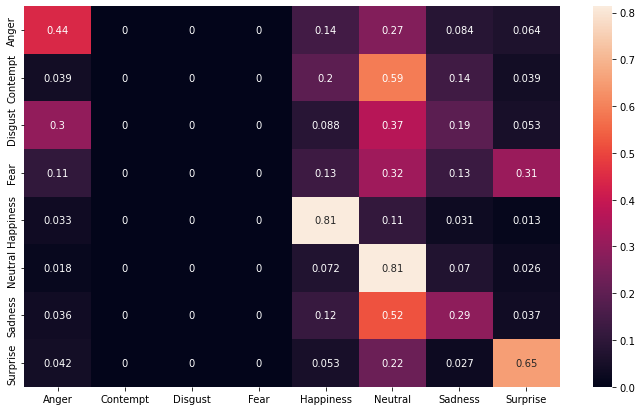

In [60]:
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [40]:
train_labels = pd.read_csv("data2/train.csv")

In [41]:
train_labels["emotion"].value_counts()

5.0    9277
4.0    6775
7.0    3205
6.0    3162
0.0    2219
3.0     586
2.0     171
1.0     148
Name: emotion, dtype: int64

In [61]:
from sklearn.metrics import precision_score, recall_score

In [62]:
print(precision_score(y_true, y_pred, average = "micro"))

0.6648823777996901


In [63]:
print(precision_score(y_true, y_pred, average = "macro"))

0.3904272619620637


/home/youssef/home/youssef/Desktop/anaconda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
print(recall_score(y_true, y_pred, average = "micro"))

0.6648823777996901


In [65]:
print(recall_score(y_true, y_pred, average = "macro"))

0.37680995876212153
